Author: Tyler Nill <br>
Co-Authors: Matthew Murphy, Brianna Isola <br>
Exoplanet Transit Markdown: <br>
Version 1.1


In [31]:
# Import the necessary packages needed for the lab analysis
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats
from scipy.stats import norm
import csv

## Data Reduction

   The exoplanet Hat-P-23 b was observed on September 18, 2019 using the transit technique. A series of CCD images were taken of the exoplanet's host star throughout the night. A series of dark frames and flat fields were also taken. A MasterDark and a MasterFlat were created, serving as an average for each one. The dark frames identified hot pixels and the flat fields corrected the relative pixel sensitivity of the CCD pixels to each other and identified dead pixels.

   The MasterDark and MasterFlat frames were found by using the program pyraf within the terminal. The MasterDark was found by median combining the 10 dark frames at 1 minute exposure, which was the exposure for the observation images. We used median combining instead of average combining because median is more representative of the actual data while the average is affected more by the outlying pixels. 

   The MasterFlat was found by median combining the 10 flat fields taken, and then normalizing it by its mode. To correct the observation images, the MasterDark was subtracted from the observation images and the MasterFlat, and then the observation images were divided by the MasterFlat.
   
   The MasterFlat and MasterDark .fits files are opened below to find some of the statistical attributes of each .fits file.

In [32]:
# Open the MasterFlat and MasterDark, gathering the data and flattening for the count values. Took the statistics needed
# for each of the files.

md = fits.open('median_dark.fits')
im_md = md[0].data
im_md_flattened = im_md.flatten()
mdf_mode = stats.mode(im_md_flattened)[0][0]
mdf_sd = np.std(im_md_flattened)
mdf_median = np.median(im_md_flattened)

mf = fits.open('median_normflat.fits')
im_mf = mf[0].data
im_mf_flattened = im_mf.flatten()
nf_median = np.median(im_mf_flattened)
nf_sd = np.std(im_mf_flattened)




Since the auto-guider did not work perfectly during the observation, the position of Hat-P-23 b's host star on the CCD varied from exposure to exposure. To avoid manually finding the position of the host star on each image, we solved for the WCS (World Coordinate System) of each image. We used the Astrometry.net service to solve for the WCS on each image. This allowed us to identify the host star based on its Right Ascension and Declination coordinates in each image.

After solving for the WCS in each observation image, the program Source Extractor was used on each image. To setup Source Exctractor, the gain and aperture settings had to be set. The gain is just the gain of the CCD used in the experiment, which is 2.06.

For the aperture, a small region had to be created on the observation images through the .fits file observation program ds9. The small region is the green circle over the host star shown below.

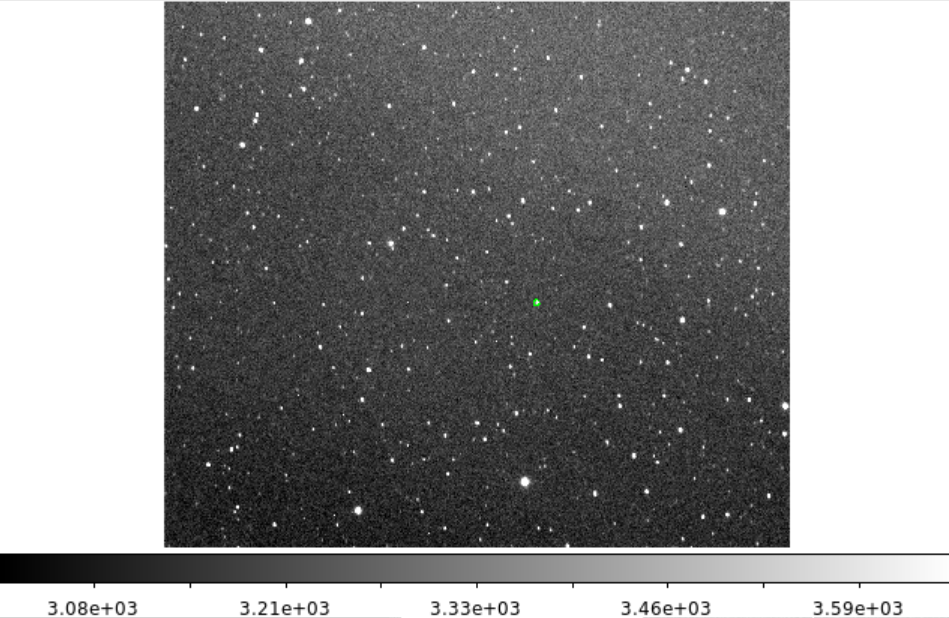

Using the region information tab in ds9, the radius was found to be 5.3 pixels. In the configuration file in Source Extractor, the aperture has to be the diameter of the circle, rather than the radius.

After checking the aperture in a few observation images, the aperture was averaged out to be 5.0 pixels. This means that the average aperture diameter was 10.0 pixels. So, the gain and the aperture were added to the configuration file and Source Extractor was run through the bash terminal on each of the observation images.

These Source Extractor files were concacatenated to create a table of time, flux, and flux error for the planet-host star. Ten more tables were created for 10 reference stars, where the reference stars were chosen so that they were in every image that was taken. The time for each table was converted from UTC to seconds. All of these tables were created into .dat files and are opened below.

Once these .dat files are opened, the mean flux of the host star and the 10 reference stars were found. Following that, the mean flux of each star was used to rescale both the flux and the error on the flux. The rescaling helps visualize the variations due to changes in airmass, the atmosphere, and intrinsic variations of stellar brightness. Then, some exposures were removed that showed large amounts of variation that deviated from the rest of the exposures.

## 4.4-5

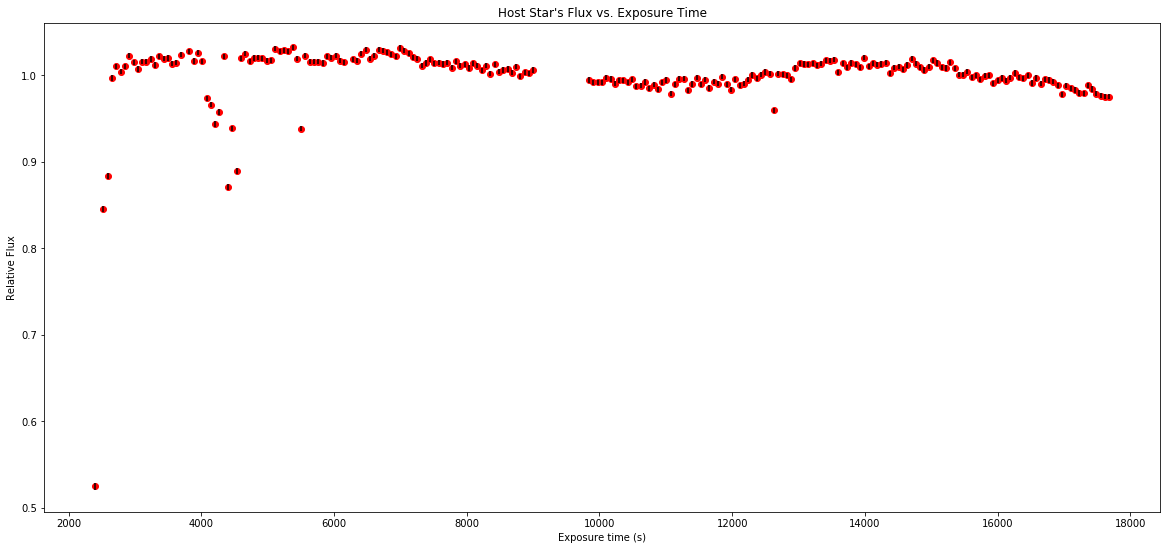

In [33]:
# Open the planet-host star and reference star tables, which are in .dat form
file1 = open('hosttable.dat')
file2 = open('ref1table.dat')
file3 = open('ref2table.dat')
file4 = open('ref3table.dat')
file5 = open('ref4table.dat')
file6 = open('ref5table.dat')
file7 = open('ref6table.dat')
file8 = open('ref7table.dat')
file9 = open('ref8table.dat')
file10 = open('ref9table.dat')
file11 = open('ref10table.dat')

# Extract each exposure's data for each table. Then find the mean flux of each star, and normalizing 
# each flux and flux error data point by the mean. Then remove the exposures that are significantly different than the others

list = []
for line in file1:
        list += [line.split()]
    
hostx = [float(x[0]) for x in list] 
hostflux = [float(y[1]) for y in list] 
hostfluxerr = [float(z[2]) for z in list]
hostmean = np.mean(hostflux)
hoststar = hostflux/hostmean
hosterr = hostfluxerr/hostmean
hostrmx = np.delete(hostx,[0,1,2,24,25,26,27,29,30,31,46,143],0)
hostrmy = np.delete(hoststar,[0,1,2,24,25,26,27,29,30,31,46,143],0)
hostrmerr= np.delete(hosterr, [0,1,2,24,25,26,27,29,30,31,46,143],0)

del list
list = []
for line in file2:
        list += [line.split()]
    
ref1x = [float(x[0]) for x in list] 
ref1flux = [float(y[1]) for y in list] 
ref1fluxerr = [float(z[2]) for z in list]
ref1mean = np.mean(ref1flux)
ref1star = ref1flux/ref1mean
ref1err = ref1fluxerr/ref1mean
ref1rmx = np.delete(ref1x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref1rmy = np.delete(ref1star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref1rmerr= np.delete(ref1err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

del list
list = []
for line in file3:
        list += [line.split()]
    
ref2x = [float(x[0]) for x in list] 
ref2flux = [float(y[1]) for y in list] 
ref2fluxerr = [float(z[2]) for z in list]
ref2mean = np.mean(ref2flux)
ref2star = ref2flux/ref2mean
ref2err = ref2fluxerr/ref2mean
ref2rmx = np.delete(ref2x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref2rmy = np.delete(ref2star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref2rmerr= np.delete(ref2err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

del list
list = []
for line in file4:
        list += [line.split()]
    
ref3x = [float(x[0]) for x in list] 
ref3flux = [float(y[1]) for y in list] 
ref3fluxerr = [float(z[2]) for z in list]
ref3mean = np.mean(ref3flux)
ref3star = ref3flux/ref3mean
ref3err = ref3fluxerr/ref3mean
ref3rmx = np.delete(ref3x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref3rmy = np.delete(ref3star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref3rmerr= np.delete(ref3err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file5:
        list += [line.split()]
    
ref4x = [float(x[0]) for x in list] 
ref4flux = [float(y[1]) for y in list] 
ref4fluxerr = [float(z[2]) for z in list]
ref4mean = np.mean(ref4flux)
ref4star = ref4flux/ref4mean
ref4err = ref4fluxerr/ref4mean
ref4rmx = np.delete(ref4x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref4rmy = np.delete(ref4star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref4rmerr= np.delete(ref4err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file6:
        list += [line.split()]
        
ref5x = [float(x[0]) for x in list] 
ref5flux = [float(y[1]) for y in list] 
ref5fluxerr = [float(z[2]) for z in list]
ref5mean = np.mean(ref5flux)
ref5star = ref5flux/ref5mean
ref5err = ref5fluxerr/ref5mean
ref5rmx = np.delete(ref5x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref5rmy = np.delete(ref5star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref5rmerr= np.delete(ref5err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file7:
        list += [line.split()]
    
ref6x = [float(x[0]) for x in list] 
ref6flux = [float(y[1]) for y in list] 
ref6fluxerr = [float(z[2]) for z in list]
ref6mean = np.mean(ref6flux)
ref6star = ref6flux/ref6mean
ref6err = ref6fluxerr/ref6mean
ref6rmx = np.delete(ref6x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref6rmy = np.delete(ref6star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref6rmerr= np.delete(ref6err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file8:
        list += [line.split()]
    
ref7x = [float(x[0]) for x in list] 
ref7flux = [float(y[1]) for y in list] 
ref7fluxerr = [float(z[2]) for z in list]
ref7mean = np.mean(ref7flux)
ref7star = ref7flux/ref7mean
ref7err = ref7fluxerr/ref7mean
ref7rmx = np.delete(ref7x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref7rmy = np.delete(ref7star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref7rmerr= np.delete(ref7err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file9:
        list += [line.split()]
    
ref8x = [float(x[0]) for x in list] 
ref8flux = [float(y[1]) for y in list] 
ref8fluxerr = [float(z[2]) for z in list]
ref8mean = np.mean(ref8flux)
ref8star = ref8flux/ref8mean
ref8err = ref8fluxerr/ref8mean
ref8rmx = np.delete(ref8x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref8rmy = np.delete(ref8star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref8rmerr= np.delete(ref8err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file10:
        list += [line.split()]
    
ref9x = [float(x[0]) for x in list] 
ref9flux = [float(y[1]) for y in list] 
ref9fluxerr = [float(z[2]) for z in list]
ref9mean = np.mean(ref9flux)
ref9star = ref9flux/ref9mean
ref9err = ref9fluxerr/ref9mean
ref9rmx = np.delete(ref9x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref9rmy = np.delete(ref9star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref9rmerr= np.delete(ref9err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

list = []
for line in file11:
        list += [line.split()]
    
ref10x = [float(x[0]) for x in list] 
ref10flux = [float(y[1]) for y in list] 
ref10fluxerr = [float(z[2]) for z in list]
ref10mean = np.mean(ref10flux)
ref10star = ref10flux/ref10mean
ref10err = ref10fluxerr/ref10mean
ref10rmx = np.delete(ref10x,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref10rmy = np.delete(ref10star,[0,1,2,24,25,26,27,29,30,31,46,143],0)
ref10rmerr= np.delete(ref10err, [0,1,2,24,25,26,27,29,30,31,46,143],0)

plt.errorbar(hostx,hoststar, yerr=hosterr, color ='red', ecolor='black', barsabove='true', fmt='o')
plt.title("Host Star's Flux vs. Exposure Time")
plt.xlabel('Exposure time (s)')
plt.ylabel('Relative Flux')
plt.show()

Here is the Host Star's relative flux plotted with respect to time, where the time is when the observations started to when they ended. The relative flux was found by normalizing the flux of each image by the average flux across all images. The flux's error of each image was normalized by the average flux across all images. 

As you can tell, there are some exposures that significantly differ from the rest of the exposures. As mentioned earlier, these exposures are removed from the analysis. The plot with the removed exposures is shown below, where there is an evident dip of when the exoplanet crossed in front of the star. The middle gap represents when the telescope was flipped to a different side due to the positioning of the telescope after hours of observing. 

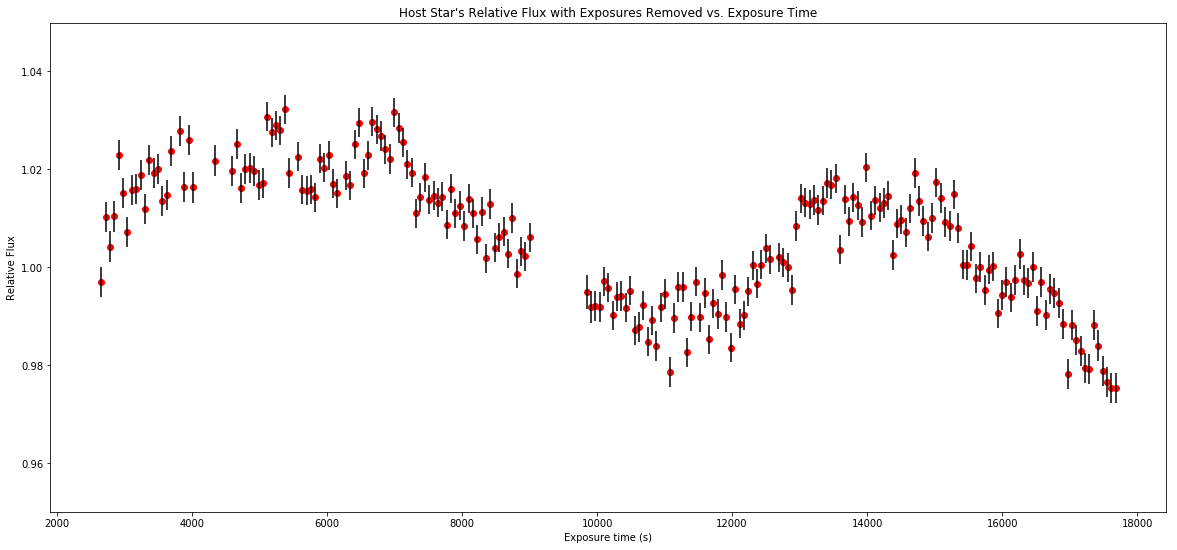

In [34]:
# Plot the host star's relative flux vs. time with some exposures removed. 
plt.errorbar(hostrmx,hostrmy, yerr = hostrmerr, color = 'red', ecolor='black', barsabove='true', fmt='o')
plt.ylabel("Relative Flux")
plt.xlabel("Exposure time (s)")
plt.title("Host Star's Relative Flux with Exposures Removed vs. Exposure Time")
plt.ylim(0.95,1.05)
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

To calibrate the host star's flux, ten reference stars were chosen and their respective flux and flux error were found the same way as the host star. 

The same exposures were removed from all of the reference stars that were removed from the host star. These ten reference stars are plotted below, where each one is increased by a certain constant so all are viewable on the same plot.

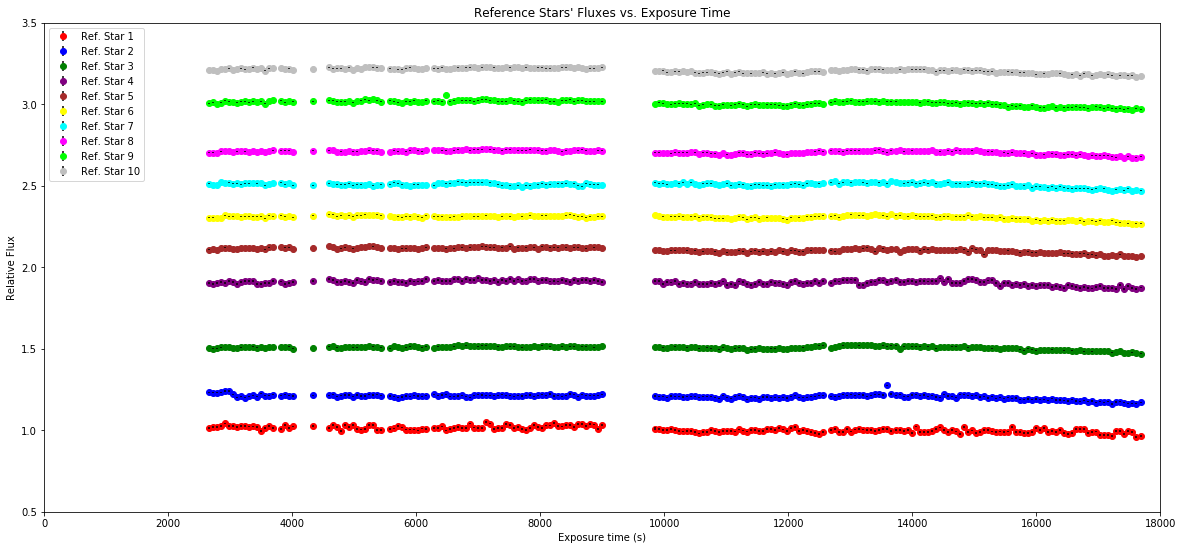

In [35]:
# Plotting each reference star, where the flux is shifted by a constant so all can be seen on one plot
plt.errorbar(ref1rmx,ref1rmy, yerr = ref1rmerr, color = 'red', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 1')
plt.errorbar(ref2rmx,ref2rmy+.2, yerr = ref2rmerr, color = 'blue', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 2')
plt.errorbar(ref3rmx,ref3rmy+.5, yerr = ref3rmerr, color = 'green', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 3')
plt.errorbar(ref4rmx,ref4rmy+.9, yerr = ref4rmerr, color = 'purple', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 4')
plt.errorbar(ref5rmx,ref5rmy+1.1, yerr = ref5rmerr, color = 'brown', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 5')
plt.errorbar(ref6rmx,ref6rmy+1.3, yerr = ref6rmerr, color = 'yellow', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 6')
plt.errorbar(ref7rmx,ref7rmy+1.5, yerr = ref6rmerr, color = 'cyan', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 7')
plt.errorbar(ref8rmx,ref8rmy+1.7, yerr = ref8rmerr, color = 'magenta', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 8')
plt.errorbar(ref9rmx,ref9rmy+2.0, yerr = ref9rmerr, color = 'lime', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 9')
plt.errorbar(ref10rmx,ref10rmy+2.2, yerr = ref10rmerr, color = '0.75', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 10')

plt.legend(loc='best')
plt.title("Reference Stars' Fluxes vs. Exposure Time")
plt.ylabel('Relative Flux')
plt.xlabel('Exposure time (s)')
plt.ylim(0.50,3.5)
plt.xlim(0,18000)
plt.rcParams["figure.figsize"] = [20,9]

Shown above is the ten reference stars, which were normalized by the mean flux of each star. The same exposures that were removed in the host star's data was removed in the reference stars' data as well. These data points were removed due to being significantly different than the rest of the data points. Each reference star will be factored into the analysis by finding the weighted mean of all the reference stars and the corresponding error on the weighted mean below.

In [36]:
# Calculation of the weighted mean, using the equation in the lab report
meannum = (ref1rmy/(ref1rmerr**2)) + (ref2rmy/(ref2rmerr**2)) + (ref3rmy/ref3rmerr**2) + (ref4rmy/ref4rmerr**2) + \
    (ref5rmy/ref5rmerr**2) + (ref6rmy/ref6rmerr**2) + (ref6rmy/ref6rmerr**2) + (ref7rmy/ref7rmerr**2) + (ref8rmy/ref8rmerr**2) \
    + (ref9rmy/ref9rmerr**2) + (ref10rmy/ref10rmerr**2) 

meandenom = 1/((ref1rmerr**2)) + 1/((ref2rmerr**2)) + 1/(ref3rmerr**2) + 1/(ref4rmerr**2) + 1/(ref5rmerr**2) + 1/(ref6rmerr**2)\
    + 1/(ref7rmerr**2) + 1/(ref8rmerr**2) + 1/(ref9rmerr**2) + 1/(ref10rmerr**2)

# Finding the weigted mean and the corresponding error on the mean
refmean = meannum/meandenom
refmeanerr = (1/meandenom)**(1/2)

# Find the ratio of the host flux divided by the weighted mean  divided by the uncertainty of the weighted mean

r_i = hostrmy/refmean
r_ierror = r_i * np.sqrt((hostrmerr/hostrmy)**2 + (refmeanerr/refmean)**2)

# Save the time of each image, flux and error of the normalized host star with respect to the reference star and its error, 
# the weighted mean of the rescaled fluxes, and the ratio mentioned above and its error to a text file that can be used later

#np.savetxt("rescale.txt", np.c_[ref1rmx,hostrmy,hostrmerr,refmean,r_i, r_ierror])

Since atmospheric conditions can cause flux changes that are as large or larger than the signal we are trying to detect, we can calculate the flux of the target stars relative to the flux of the reference stars. This should account for the changes in the atmospheric conditions. This can be done by averaging over the ten reference stars, which reduces that statistical noise as well as the systematic uncertainty from the variability in the reference stars. 

To do this, the weighted mean is computed by using the equation <br>

\begin{equation}
\mu^{ref}_i = \frac{\Sigma_j \frac{f^{ref}_j}{(\sigma^{ref}_j)^2}}{\Sigma_j \frac{1}{(\sigma^{ref}_j)^2}},
\end{equation}

where $f^{ref}_j$ is the flux of reference star $j$, $\sigma^{ref}_j$ is the error corresponding to the flux of the reference star $j$, and $\mu^{ref}_i$ is the weighted mean of the reference stars.

The corresponding error on the weighted mean is:
\begin{equation}
\sigma^{ref}_j = \Bigg(\frac{1}{\frac{1}{(\Sigma_j \sigma^{ref}_j)^2}}\Bigg) ^{1/2}.
\end{equation}

Using this, the ratio $r_i = \frac{f^{sci}_i}{\mu^{sci}_i}$ is found, where $f^{sci}_i$ is the flux of the observational CCD images, and $\mu^{sci}_i$ is the weighted mean of the reference stars. The ratio's error is $\sigma_r = r_i \Bigg(\bigg(\frac{\sigma_{host}}{f^{sci}_i}\bigg)^2 + \bigg(\frac{\sigma_{mean}}{\mu^{ref}_i}\bigg)^2\Bigg) ^ {1/2}$, where $\sigma_{host}$ is the error of the exoplanet's host star, and $\sigma_{mean}$ is the corresponding error on the weighted mean. The error on $r_i$ was found by using simple error propagation.

To normalize $r_i$, we will divide it and its error by the baseline flux. The baseline flux is found by taking the flux before and after transit; however, this was not the case for our data. If you look at the plot below, the plot clearly shows when the transit starts, indicated by the blue vertical line. When you look at the green vertical line, which indicates when the transit ends, it is unclear when the transit ends. So, the baseline flux was calculated by taking the 58 flux values before the transit starts instead of taking values at the end of the transit. 

Then, the normalized flux and its error were plotted vs. exposure time below, with the vertical lines indicating when the transit starts and roughly when the transit ends. The ratio $r_i$ represents the fraction of light from the host star that is not obscured by the transiting planet. 


## Data Analysis

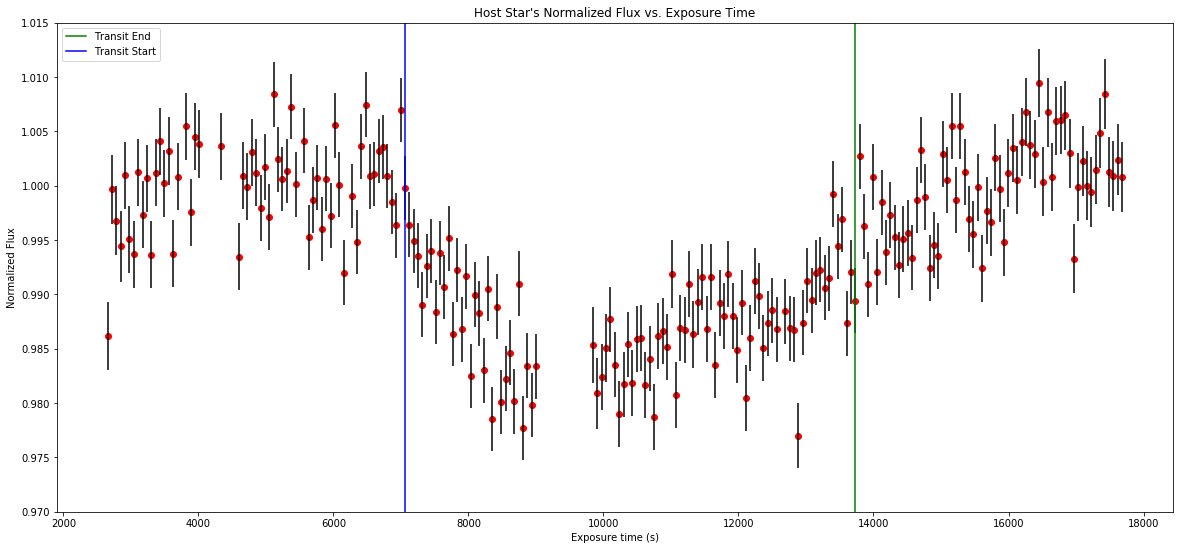

In [37]:
# Calculate the base flux based off the first 58 flux values before the transit starts
baseflux = np.mean(r_i[0:58])

# Normalize the ratio and its error by the baseline flux
norm_r_i = r_i / baseflux
norm_r_ierror = r_ierror / baseflux

# Create the two vertical lines that indicate when the transit starts and ends
x1 = [13730.7,13730.7]
y1 = [0.97,1.015]
x2 = [7059.76, 7059.76]
y2 = [0.97,1.015]

# Plot the normalized host star's flux and flux err vs. exposure time and plot vertical lines indicating when the 
# transit starts and ends
plt.errorbar(hostrmx,norm_r_i, yerr=norm_r_ierror,color = 'red', ecolor='black', barsabove='true', fmt='o')
plt.plot(x1, y1, color= 'green', label='Transit End')
plt.plot(x2, y2, color= 'blue', label='Transit Start')
plt.legend(loc='upper left')
plt.ylabel("Normalized Flux")
plt.xlabel("Exposure time (s)")
plt.title("Host Star's Normalized Flux vs. Exposure Time")
plt.ylim(0.97,1.015)
plt.rcParams["figure.figsize"] = [20,9]
plt.show()


The plot above shows that there is evidently a transit detection within our data, which was the goal of the experiment. The baseline flux was calculated by only using the flux values to the left of the blue vertical line since it is unclear when the transit ends near the green vertical line. 

The transit flux, baseline flux, transit depth, planet-to-star-ratio, transit duration, and their corresponding errors are found below.

In [38]:
# Calculate the transit flux and baseline flux (and its mean) and their corresponding errors. 
transit_flux = norm_r_i[59:148]
transit_flux_error = norm_r_ierror[59:148]

baseline_flux_list = norm_r_i[np.r_[0:58]]
baseline_flux_list_error = norm_r_ierror[np.r_[0:58]]
baseline_flux_list_mean = np.mean(baseline_flux_list)

# Find the uncertainty on the mean of the baseline flux
sum = 0.0
for i,val in enumerate(baseline_flux_list_error):
    x = 1/val
    sum += pow(x,2)
    
baseline_flux_error = np.sqrt(1/sum)

# Find the uncertainty on the mean of the transit flux
transit_mean = np.mean(transit_flux)

sum = 0.0
for i,val in enumerate(transit_flux_error):
    x = 1/val
    sum += pow(x,2)
    
transit_error = np.sqrt(1/sum)

# Calculate the transit depth and its error
transit_depth= baseline_flux_list_mean - transit_mean
transit_depth_error = np.sqrt(baseline_flux_error**2 + transit_error**2)

print("Transit Flux = ", transit_mean, "+/-", transit_error)
print("Baseline Flux = ", baseline_flux_list_mean, " +/-", baseline_flux_error)
print("Transit Depth = ", transit_depth*100, "+/-", transit_depth_error*100)

# Calculate the planet to star ratio and its error
planet_to_star_ratio = np.sqrt(transit_depth)
planet_to_star_ratio_error = (transit_depth_error / (2*transit_depth)) * planet_to_star_ratio
print("Planet to Star Radius Ratio = ", planet_to_star_ratio, "+/-", planet_to_star_ratio_error)

# Calculate the measured transit duration and its error
measured_transit_duration = hostrmx[148] - hostrmx[58]
measured_transit_duration_error = np.sqrt((60)**2 + (420)**2)
print("Transit Duration = ",measured_transit_duration, "seconds +/-", measured_transit_duration_error, "seconds")

('Transit Flux = ', 0.9873379254056855, '+/-', 0.00031858913785520385)
('Baseline Flux = ', 1.0, ' +/-', 0.00039761386848828487)
('Transit Depth = ', 1.2662074594314454, '+/-', 0.050950547315366614)
('Planet to Star Radius Ratio = ', 0.11252588410812178, '+/-', 0.0022639478782681766)
('Transit Duration = ', 6670.9400000000005, 'seconds +/-', 424.26406871192853, 'seconds')


The baseline flux was found by taking the average of the flux values before the transit starts (before the blue vertical line). Since we took the average of the baseline flux, the error of it had to be found by using the equation:

\begin{equation}
\sigma^2_{mean} = \frac{1}{\Sigma_i \frac{1}{\sigma_i^2}}
\end{equation}

where denominator represents the sum of each baseline flux error. 

The transit flux was found by taking the average of the flux values between the two vertical lines. The error of the transit flux was found by using the same equation above. 

The transit depth was found by subtracting the mean transit flux from the mean baseline flux. The error of the transit depth was found by the simple error propagation formula: 

\begin{equation}
\sigma_{depth} = \sqrt{\sigma^2_{baseflux} + \sigma^2_{transit}}
\end{equation}

where $\sigma_{baseflux}$ is the error of the baseline flux and $\sigma_{transit}$ is the error of the transit flux.

Since the transit depth equation is

\begin{equation}
\delta_{depth} = \bigg( \frac{R_p}{R_{star}} \bigg) ^2 = R^2,
\end{equation}

where $R_p$ is the radius of the transiting planet and $R_{star}$ is the radius of the host star. This means that planet-to-star radius ratio is simply the square root of the transit depth. The error of the planet-to-star radius ratio is found by the equations for single variable uncertainty: 

\begin{equation}
R = X^n,    \sigma_R = n \frac{\sigma_X}{X} R,
\end{equation}

where R is the planet-to-star radius ratio and X is the transit depth in this case. This means that the error for the planet to star radius ratio is: 

\begin{equation}
\sigma_{R} = \frac{1}{2} \frac{\sigma_{\delta}}{\delta} R.
\end{equation}

The last value that was found was the transit duration. This was found by subtracting the exposure time of the start of the transit by the exposure time of the end of the transit. The uncertainties of each time were found by how certain we were in where the transit started and where the transit ended. So, we chose about one exposure for the transit start since it is clear when the transit starts, where one exposure is equal to 60 seconds. For the end of the transit time, there was a lot more uncertainty for where the transit ended. So, we chose about seven exposures, which means that there was an error of around 420 seconds. Then, the uncertainty of was found the same way as the transit depth uncertainty.

Literature Values: 

In [39]:
# Calculate the literature values of the transit depth, planet to star radius ratio, and the transit duration from the values
# found in the links below.

planet_to_star_ratio_lit1 = 0.1169
planet_to_star_ratio_lit1_error = 0.0012
transit_depth_lit1 = planet_to_star_ratio_lit1**2
transit_depth_error_lit1 = (1/2) * (planet_to_star_ratio_lit1_error/planet_to_star_ratio_lit1) * transit_depth_lit1
transit_duration_lit1 = 0.0908 *24*3600
transit_duration_error_lit1 = 0.0007 *24 *3600
print("Literature 1 Measurement Values:")
print("Transit Depth = ", transit_depth_lit1*100, "+/-", transit_depth_error_lit1*100)
print("Planet to Star Radius Ratio = ", planet_to_star_ratio_lit1, "+/-", planet_to_star_ratio_lit1_error)
print("Transit Duration ", transit_duration_lit1, "seconds +/-", transit_duration_error_lit1, "seconds")

planet_to_star_ratio_lit2 =  0.1209
planet_to_star_ratio_lit2_error_plus = 0.0015
planet_to_star_ratio_lit2_error_minus = 0.0011
transit_depth_lit2 = planet_to_star_ratio_lit2**2
transit_depth_error_lit2_plus = (1/2) * (planet_to_star_ratio_lit2_error_plus/planet_to_star_ratio_lit2) * transit_depth_lit2
transit_depth_error_lit2_minus = (1/2) * (planet_to_star_ratio_lit2_error_minus/planet_to_star_ratio_lit2) * transit_depth_lit2
transit_duration_lit2 = 0.0822 *24*3600
transit_duration_error_lit2_plus = 0.0005 *24 *3600
transit_duration_error_lit2_minus = 0.0008 *24 *3600


print("Literature 2 Measurement Values:")
print("Transit Depth = ", transit_depth_lit2*100, "+", transit_depth_error_lit2_plus*100, "-", transit_depth_error_lit2_minus*100)
print("Planet to Star Radius Ratio = ", planet_to_star_ratio_lit2, "+", planet_to_star_ratio_lit2_error_plus, \
     "-", planet_to_star_ratio_lit2_error_minus)
print("Transit Duration ", transit_duration_lit2, "seconds +", transit_duration_error_lit2_plus, "seconds -", \
     transit_duration_error_lit2_minus, "seconds")



Literature 1 Measurement Values:
('Transit Depth = ', 1.3665610000000001, '+/-', 0.007014)
('Planet to Star Radius Ratio = ', 0.1169, '+/-', 0.0012)
('Transit Duration ', 7845.120000000001, 'seconds +/-', 60.48, 'seconds')
Literature 2 Measurement Values:
('Transit Depth = ', 1.461681, '+', 0.0090675, '-', 0.006649500000000001)
('Planet to Star Radius Ratio = ', 0.1209, '+', 0.0015, '-', 0.0011)
('Transit Duration ', 7102.08, 'seconds +', 43.2, 'seconds -', 69.12, 'seconds')


In [40]:
print("Literature 1: https://arxiv.org/pdf/1008.3388.pdf")
print("Literature 2: https://arxiv.org/pdf/1407.6765.pdf")

Literature 1: https://arxiv.org/pdf/1008.3388.pdf
Literature 2: https://arxiv.org/pdf/1407.6765.pdf
